# Chapter 1 Dawei Wang 

The purpose of this chapter is to ensure that you have everything you need installed and working properly and also to provide a refresher for your basic knowledge of Python and various relevant Python libraries. You will also briefly explore the Scikit Surprise package for recommender systems that we will use more extensively later.

## This notebook contains the following four parts
### Part 1. Basic Data Processing, Analysis, and Visualization 
### Part 2. Regression-Based Prediction Models
### Part 3. Simple Popularity Based Prediction Model
### Part 4. Trying out the Scikit Surpise Package for Recommendation

In [1]:
import os
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
from platform import python_version

pd.set_option('max_columns',200)
pd.set_option('display.precision',2)

print('Version list\n')
print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(sp.__name__, sp.__version__)
print(sns.__name__, sns.__version__)
print(matplotlib.__name__, matplotlib.__version__)

Version list

python 3.9.7
numpy 1.22.2
pandas 1.3.5
scipy 1.7.3
seaborn 0.11.2
matplotlib 3.5.1


## Part 1. Basic Data Processing, Analysis, and Visualization
### a. Read data, create length column, and remove all unwanted data

After reading in the data, add a new variable "rev_length" to the data frame containing the length of each review text in terms of the number of characters. Then remove the "review_text" variable as well as variables containing dates to create a new working data frame for the rest of this assignment. Display the top 10 entries in the data frame.

In [2]:
df = pd.read_json('/data/fantasy_10000.json', lines=True)
print(type(df))
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,A beautiful story. Neil Gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,5,1
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,Sat Apr 05 09:30:53 -0700 2014,Wed Mar 22 11:33:10 -0700 2017,Mon Aug 25 00:00:00 -0700 2014,Sat Aug 16 00:00:00 -0700 2014,25,5
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,A fun fast paced book that sucks you in right ...,Tue Dec 04 11:12:22 -0800 2012,Sat Jul 26 11:43:28 -0700 2014,Tue Jul 08 00:00:00 -0700 2014,Wed Jul 02 00:00:00 -0700 2014,5,1
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,"This book has a great premise, and is full of ...",Mon Jul 02 16:04:16 -0700 2012,Wed Mar 22 11:32:20 -0700 2017,Wed Aug 15 00:00:00 -0700 2012,Sun Aug 12 00:00:00 -0700 2012,7,0


In [3]:
def getLen (row):
    '''This is the function that could get the length of "review_text"'''
    return len(row["review_text"])
# create the length column 
df['rev_length'] = df.apply(lambda x: getLen(x), axis = 1)

In [4]:
# drop all unwanted data
df = df.drop(columns=['review_text','date_added','date_updated','read_at','started_at'])
# show first 10 rows
df.head(10)

,user_id,book_id,review_id,rating,n_votes,n_comments,rev_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,28,1,2086
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,5,1,1521
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,25,5,1519
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,5,1,1791
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,7,0,1762
5,8842281e1d1347389f2ab93d60773d4d,62291,e23965adda7ce7e7e415a1339e169065,5,5,1,470
6,8842281e1d1347389f2ab93d60773d4d,41804,2bcbe2300fe1801197f9bfe1f1c883ba,5,12,2,823
7,8842281e1d1347389f2ab93d60773d4d,136251,132eab4c9a3724493204cc083e0e2ecc,5,6,3,532
8,8842281e1d1347389f2ab93d60773d4d,142296,400f536181a8ccf3a0f6b37d3fec14eb,4,6,2,616
9,8842281e1d1347389f2ab93d60773d4d,76620,9206654986a733bd753753aa0c882813,5,30,2,548


<font size = 4>*The data frame looks like above after edit.*
### b. display data frame information 

Use Pandas to display basic summary statistics (such as mean, min, max) for the numeric variables. Then, compute the total number of unique users and unique items (books) in the data. Also determine if there are any null values in the data.

In [5]:
# show 5-number summary and count, mean as well as standard divation 
df[['rating','n_votes','n_comments','rev_length']].describe()

,rating,n_votes,n_comments,rev_length
count,10000.00,10000.00,10000.00,10000.00
mean,3.74,1.59,0.28,791.69
std,1.25,11.35,1.50,1022.92
min,0.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,157.00
50%,4.00,0.00,0.00,429.00
75%,5.00,1.00,0.00,983.00
max,5.00,355.00,45.00,14306.00


<font size = 4>*All summary of numeric varibles listed above. Although book_id is numeric from orginal data frame, it doesn't mean anything here.*

In [6]:
# print unique value 
print('There are {} unique users.'.format(len(df.user_id.unique())))
print('There are {} unique books.'.format(len(df.book_id.unique())))

There are 649 unique users.
There are 6465 unique books.


In [7]:
df.isnull().sum()

user_id       0
book_id       0
review_id     0
rating        0
n_votes       0
n_comments    0
rev_length    0
dtype: int64

<font size = 4>*There is no null value in the dataset.*

### c. display distributions

Use Pandas, Matplotlib, or other appropriate Python tools to visualize the distributions of variables "n_votes", "n_comments" and "rev_length". Also, compute and display the distribution of the counts of rating values.

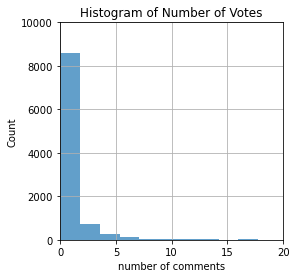

In [8]:
plt.figure(figsize=(4,4))
plt.hist(df['n_votes'], bins=200, alpha=0.7)
plt.xlabel('number of comments')
plt.ylabel('Count')
plt.title('Histogram of Number of Votes')
plt.axis([0,20, 0, 10000])
plt.grid(True)

In [9]:
df.n_votes.value_counts()

0      7220
1      1390
2       499
3       226
4       179
       ... 
64        1
133       1
70        1
231       1
127       1
Name: n_votes, Length: 92, dtype: int64

<font size = 4>*Since votes and comments are mostly 0 and 1s, here we use violin plot to check on the distribution again*

[Text(0.5, 1.0, 'Violin Plot of n_votes')]

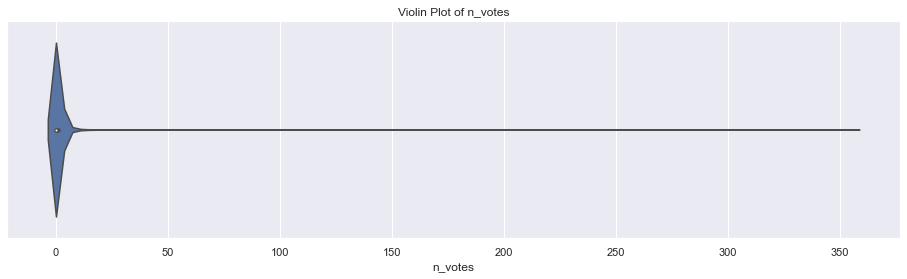

In [10]:
sns.set(rc = {'figure.figsize':(16,4)})
sns.violinplot(x= df.n_votes).set(title= 'Violin Plot of n_votes')

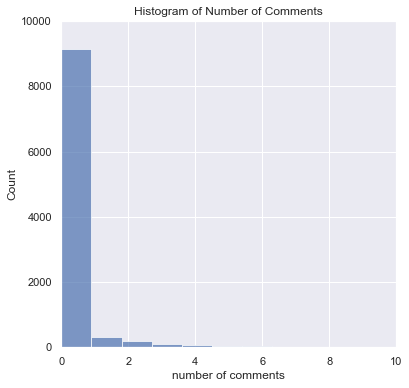

In [11]:
plt.figure(figsize=(6,6))
plt.hist(df['n_comments'], bins=50, alpha=0.7)
plt.xlabel('number of comments')
plt.ylabel('Count')
plt.title('Histogram of Number of Comments')
plt.axis([0,10, 0, 10000])
plt.grid(True)

In [12]:
df.n_comments.value_counts()

0     9142
1      327
2      207
3       96
4       76
5       34
6       30
7       18
8       15
10      10
11      10
9        8
17       4
14       3
19       3
21       2
16       2
18       2
29       1
12       1
15       1
22       1
27       1
30       1
26       1
40       1
45       1
24       1
20       1
Name: n_comments, dtype: int64

<font size = 4>*Similar to n_votes, let's check the violin plot*

[Text(0.5, 1.0, 'Violin Plot of n_comments')]

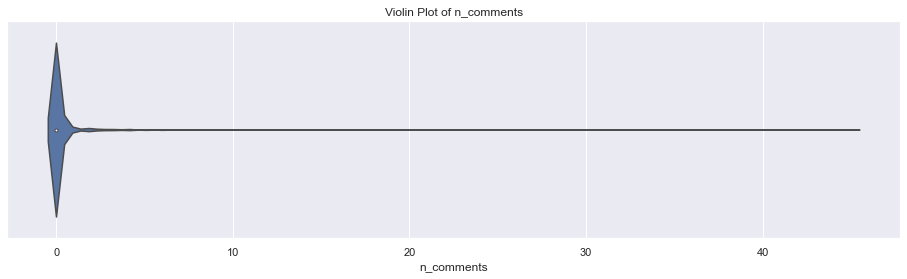

In [13]:
sns.set(rc = {'figure.figsize':(16,4)})
sns.violinplot(x= df.n_comments).set(title= 'Violin Plot of n_comments')

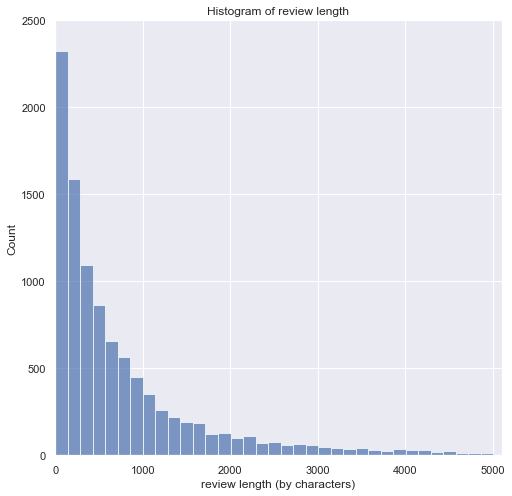

In [14]:
plt.figure(figsize=(8,8))
plt.hist(df['rev_length'], bins=100, alpha=0.7)
plt.xlabel('review length (by characters)')
plt.ylabel('Count')
plt.title('Histogram of review length')
plt.axis([0,5100, 0, 2500])
plt.grid(True)

<font size = 4>*Get counts for each rate and plot the rating frequncy*

In [15]:
ct = pd.DataFrame(df.rating.value_counts())

In [16]:
ct.reset_index(inplace=True)
ct.columns = ['Rating','Counts']

In [17]:
ct

,Rating,Counts
0,4,3265
1,5,3232
2,3,2113
3,2,778
4,0,326
5,1,286


[Text(0.5, 1.0, 'Counts of rating values')]

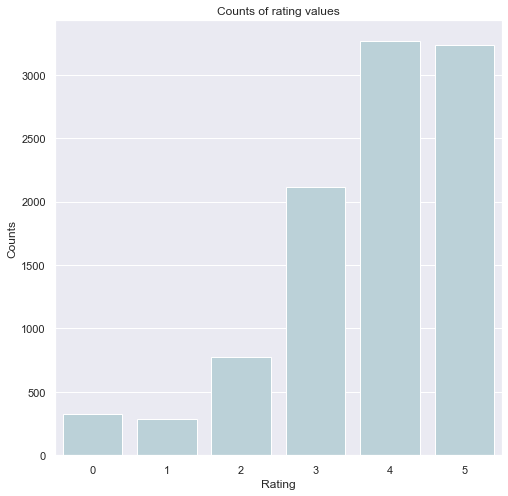

In [18]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x = "Rating", y = "Counts", data = ct, color = "lightblue",
            saturation=.5).set(title='Counts of rating values')

### d. rating frequncy 

Using a line plot, display the distribution of user rating frequncy (the combined number of ratings given by each user across all items). Your line plot should have users, sorted by rating frequency, in the x_axis and the number of ratings per user in the y-axis. Create a similar plot for the book rating frequency (total number of ratings received by each book).

In [19]:
ur = pd.DataFrame(df.user_id.value_counts())
ur.reset_index(inplace=True)
ur.columns = ['user','Counts']

[Text(0.5, 0, 'Users'), Text(0.5, 1.0, 'User rating frequency')]

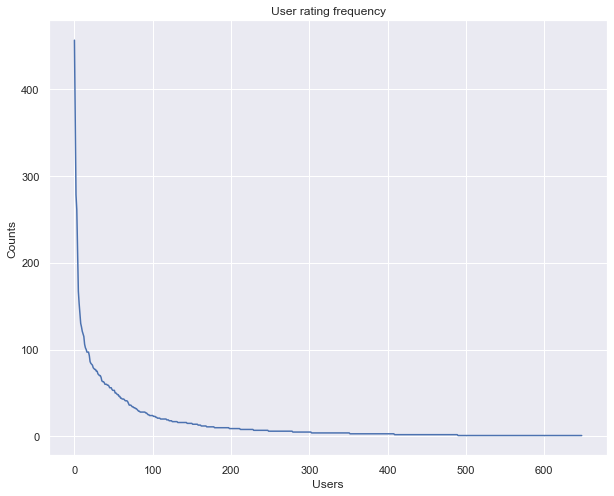

In [20]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.lineplot(x=ur.index, y=ur.Counts).set(xlabel='Users',title='User rating frequency')

[Text(0.5, 0, 'Books'), Text(0.5, 1.0, 'Book rating frequency')]

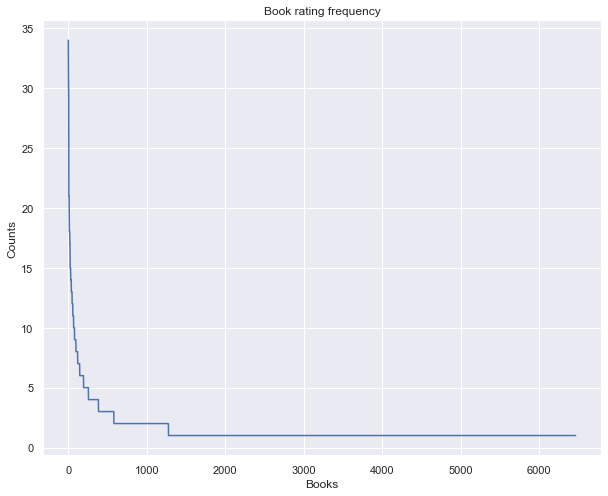

In [21]:
bk = pd.DataFrame(df.book_id.value_counts())
bk.reset_index(inplace=True)
bk.columns = ['book','Counts']
sns.lineplot(x=bk.index, y=bk.Counts).set(xlabel='Books', title="Book rating frequency")

Finally, create a correlation matrix showing pairwise Pearson correlation coefficients among the four numeric variables ("rating", "n_votes", "n_comments", and "rev_length").

<font size = 4>*Here's the Pearson correlation coefficients of 4 numeric varibles*

In [22]:
cor = df[['rating','n_votes','n_comments','rev_length']].corr()
cor

,rating,n_votes,n_comments,rev_length
rating,1.00e+00,9.66e-03,-0.03,0.06
n_votes,9.66e-03,1.00e+00,0.33,0.02
n_comments,-3.03e-02,3.35e-01,1.00,0.15
rev_length,5.63e-02,2.43e-02,0.15,1.00



## Part 2. Regression-Based Prediction Models
### 2a

Construct and evaluate a basic regression models to predict the "rating" value (the target variable) based on the other 3 numeric values ("n_votes", "n_comments", and "rev_length"). Use Scikit-learn's sklearn.linear_model package for this purpose. Begin by separating the "rating" target variable from the rest of the data to be used for training. Next, split the data into 80%-20% training-test partitions. You can use the train_test_split function from sklearn.model_selection package to do this (use a fixed random_state parameter so that results remain the same in different runs). Create a simple linear regression model to predict "rating". Fit your model to the 80% training data and compute the RMSE score on the 20% test data.

In [23]:
X = df[['n_votes','n_comments','rev_length']]
y = df[['rating']]

In [24]:
y

,rating
0,5
1,5
2,5
3,4
4,3
...,...
9995,4
9996,4
9997,0
9998,2


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)


<font size = 4> *Simple linear regression*

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create linear regression object
reg = LinearRegression()

# Train the model using the training set
reg.fit(X_train, y_train)
pred = reg.predict(X_train)
pred[0:10]

array([[3.78786677],
       [3.83797923],
       [3.69906877],
       [3.78109999],
       [3.71030417],
       [3.61120034],
       [3.70749532],
       [3.70423961],
       [3.70226064],
       [3.71190011]])

In [27]:
sum_mean=0
for i in range(len(pred)):
    sum_mean+=(pred[i]-y_train.values[i])**2
    RMSE=np.sqrt(sum_mean/len(pred))[0]

print("RMSE on Training Data: ", RMSE.round(4))

RMSE on Training Data:  1.2425


In [28]:
pred_test = reg.predict(X_test)
sum_mean=0
for i in range(len(pred_test)):
    sum_mean+=(pred_test[i]-y_test.values[i])**2
    RMSE=np.sqrt(sum_mean/len(pred))[0]

print("RMSE on Testing Data: ", RMSE.round(4))

RMSE on Testing Data:  0.6267


<font size =4>*RMSE on testing data reported above*  


### 2b  
#### Find RMSE on different alphas in Rideg regression 

Train and optimize a regularized regression model using Ridge regression (regression with Ridge or L2 regularization) in Scikit-learn. You'll use the same train-test split as before. Perform cross-validation for the following range of "alpha" parameter values (this is the regularization coefficient): alpha = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]. For each alpha value you should perform 5-fold cross-validation on the training data and compute the mean RMSE score across the 5 folds for that alpha value. record the mean RMSE values for each alpha value. Create a chart that depicts the mean RMSE values against the alpha values. Now, use the best alpha value (one with the lowest RMSE) and train a final Ridge regression model on the full 80% rain data. Then use the predictions from this model to compute the final RMSE score on the 20% test data. Compare this result on the final RMSE obtained from simple linear regression.

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]

rmse = np.array([])
for a in alpha:
    ridge_regression = Ridge(alpha=a)
    
    scores = cross_val_score(ridge_regression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores = np.sqrt(abs(scores))
    
    rmse = np.append(rmse, [scores.mean()])
    print('{:10.3f}\t{:.4f}'.format(a,scores.mean()))

     0.000	1.2428
     0.010	1.2428
     0.100	1.2428
     0.500	1.2428
     1.000	1.2428
     5.000	1.2428
    10.000	1.2428
    50.000	1.2428
   100.000	1.2428
   300.000	1.2427
   500.000	1.2427
   700.000	1.2427
  1000.000	1.2427
  1500.000	1.2427
  2000.000	1.2427
  2500.000	1.2428
  3000.000	1.2428


[Text(0.5, 0, 'Regularization Coefficient'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'Ridge Regression X-Validation')]

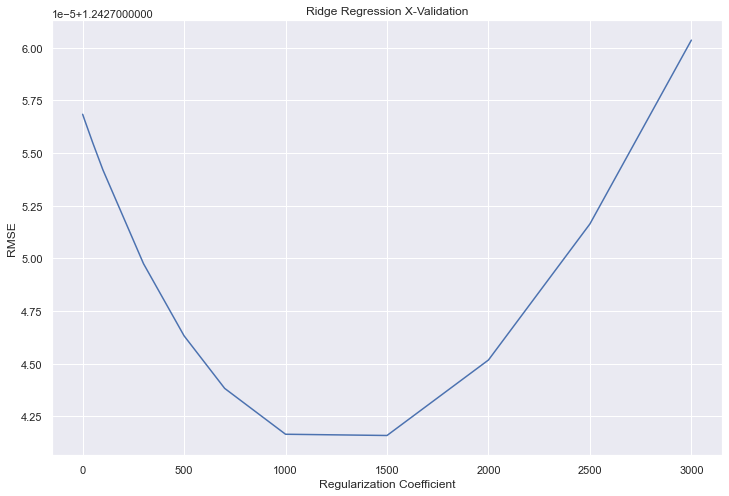

In [30]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.lineplot(x=alpha, y=rmse).set(xlabel="Regularization Coefficient", 
                                  ylabel="RMSE",title='Ridge Regression X-Validation')

In [31]:
a_min = alpha[rmse.tolist().index(rmse.min())]
print ("The best alpha value is {}".format(a_min))

The best alpha value is 1500.0


In [32]:
ridge = Ridge(alpha=1500)
ridge.fit(X_train, y_train)
pred_test_R = ridge.predict(X_test)
sum_mean=0
for i in range(len(pred_test_R)):
    sum_mean+=(pred_test_R[i]-y_test.values[i])**2
    RMSE_R=np.sqrt(sum_mean/len(pred))[0]

print("RMSE on Testing Data: ", RMSE_R.round(4))

RMSE on Testing Data:  0.6266


<font size =4>*The best alpha is 1500 and apply it to ridge regression. Here we can have RMSE on testing data*

In [33]:
print('RMSE of Simple regression:{}\nRMSE of Ridge regression:{}'.format(RMSE, RMSE_R))

RMSE of Simple regression:0.6266723062132303
RMSE of Ridge regression:0.6266364293245104


## Part 3. Simple Popularity Based Prediction Model

Consider a simple non-personalized model that for each user-book pair (u,b) predicts the user u's rating on book b to be the average rating on book b across all users in the training data. Write a program to implement this model. The training component might be a simple function that takes the training data and returns a data structure containing average ratings for each book. The prediction component should take as input the test data and the data structure containing the average ratings, and return a list or array of predicted ratings (similar to the "predict" function in Scikit-learn's regression models). Use your predictor to compute the RMSE score on the test data. Compare this result with the results you obtained for the regression models.

In [34]:
class NonPersonalizedModel: 
    '''This is a non-personalized model. The model predicts the user u's rating on book b by computing the average 
    rating on book b across all users in the training data '''
    
    def train (self,train):
        'takes the training data and returns a data structure containing average ratings for each book'
        self.train = train 
        # extract book id and ratings and put in to a dictionary
        self.convert = {}
        for row in self.train.itertuples():
            b_id = getattr(row,'book_id')
            rate = getattr(row,'rating')
            if b_id in self.convert.keys():
                self.convert[b_id].append(rate)
            else:
                self.convert[b_id]= [rate]
        # calculate the mean rating for each book and save in a dictionary 
        self.r = {}
        for key in self.convert.keys():
            self.r[str(key)] = np.mean(self.convert[key])
        return self.r
    
    
    def predict (self,test,r):
        '''This function takes the test data and the data structure containing the average ratings, '''
        ''' and return a list or array of predicted ratings.'''
        ''' Give the test dataframe and the rating obtianed from train function(Optional)'''
        self.test = test
        self.pred = []
        # for each entry in the test dataset, pull book id out and find the corresponding rating value 
        for row in self.test.itertuples():
            b_id = str(getattr(row,'book_id'))
            
            if b_id in self.r.keys():
                self.pred.append(self.r[b_id])
            else:
                self.pred.append('Null')
                
        return self.pred
    
    def rmse(self):
        '''This function help to calculate RMSE on testing data'''
        org = self.test['rating'].tolist()
        sum_mean=0
        count = 0
        for i in range(len(self.pred)):
            if self.pred[i] != 'Null':
                sum_mean+=(self.pred[i]-org[i])**2
                count += 1
            else:
                print('Missing training data for user_{}, cannot predict. This data point will not count in RMSE'.format(i))
            self.rmse_test =np.sqrt(sum_mean/count)
        return self.rmse_test

In [35]:
train,test = train_test_split(df, test_size=0.2, random_state=66)
a = NonPersonalizedModel()
rate = a.train(train)
rate

{'31622576': 4.0,
 '17162437': 5.0,
 '18046743': 1.0,
 '17934886': 5.0,
 '17061': 3.5,
 '27272506': 3.0,
 '7327916': 3.0,
 '10836728': 3.25,
 '17465483': 5.0,
 '28187': 3.5,
 '14740590': 3.0,
 '27405702': 2.0,
 '23197122': 4.0,
 '23660326': 3.0,
 '13411245': 2.0,
 '10637766': 4.0,
 '199786': 4.5,
 '6294': 3.4,
 '72193': 4.5,
 '49041': 3.0,
 '1062774': 3.0,
 '15754113': 5.0,
 '30408280': 4.0,
 '17429833': 4.0,
 '9858714': 4.5,
 '5983694': 4.666666666666667,
 '28094400': 3.0,
 '8908': 4.25,
 '395871': 3.0,
 '8621462': 4.6,
 '18053143': 4.0,
 '207684': 3.0,
 '25187640': 4.0,
 '16268911': 5.0,
 '6580510': 3.0,
 '244475': 3.0,
 '12558285': 4.0,
 '40290': 0.0,
 '13302279': 3.0,
 '1656001': 3.3529411764705883,
 '1048623': 0.0,
 '6304335': 3.4285714285714284,
 '1': 4.4,
 '24469717': 3.0,
 '11801463': 3.0,
 '42899': 3.6470588235294117,
 '4502877': 4.428571428571429,
 '831186': 4.0,
 '25243409': 5.0,
 '7896527': 3.6153846153846154,
 '13603792': 5.0,
 '6382661': 3.0,
 '31226229': 3.0,
 '8966': 0.

<font size = 4>*As we can see, train function returns a dictionary of book and it's average rating. The predict function below could give us the prediction for each book and user pair.*

In [36]:
a.predict(test,rate)

[4.333333333333333,
 4.375,
 4.333333333333333,
 'Null',
 5.0,
 'Null',
 'Null',
 3.0,
 'Null',
 5.0,
 3.0,
 3.6470588235294117,
 3.8,
 'Null',
 'Null',
 'Null',
 4.0,
 'Null',
 'Null',
 3.5,
 3.875,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 4.7272727272727275,
 'Null',
 3.3529411764705883,
 'Null',
 'Null',
 3.5,
 'Null',
 4.4,
 4.555555555555555,
 4.0,
 5.0,
 'Null',
 'Null',
 5.0,
 3.0,
 'Null',
 'Null',
 'Null',
 4.142857142857143,
 'Null',
 4.0,
 'Null',
 3.0,
 'Null',
 'Null',
 'Null',
 4.153846153846154,
 'Null',
 0.0,
 'Null',
 'Null',
 4.0,
 'Null',
 'Null',
 4.0,
 'Null',
 5.0,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 3.5833333333333335,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 3.0,
 'Null',
 'Null',
 3.0,
 'Null',
 0.0,
 'Null',
 'Null',
 4.25,
 'Null',
 'Null',
 3.4210526315789473,
 4.5,
 4.0,
 'Null',
 4.0,
 5.0,
 'Null',
 3.0,
 'Null',
 3.909090909090909,
 'Null',
 'Null',
 'Null',
 'Null',
 5.0,

In [37]:
print("RMSE on Testing Data: ", a.rmse().round(4))

Missing training data for user_3, cannot predict. This data point will not count in RMSE
Missing training data for user_5, cannot predict. This data point will not count in RMSE
Missing training data for user_6, cannot predict. This data point will not count in RMSE
Missing training data for user_8, cannot predict. This data point will not count in RMSE
Missing training data for user_13, cannot predict. This data point will not count in RMSE
Missing training data for user_14, cannot predict. This data point will not count in RMSE
Missing training data for user_15, cannot predict. This data point will not count in RMSE
Missing training data for user_17, cannot predict. This data point will not count in RMSE
Missing training data for user_18, cannot predict. This data point will not count in RMSE
Missing training data for user_21, cannot predict. This data point will not count in RMSE
Missing training data for user_22, cannot predict. This data point will not count in RMSE
Missing traini

In [38]:
a.rmse()

Missing training data for user_3, cannot predict. This data point will not count in RMSE
Missing training data for user_5, cannot predict. This data point will not count in RMSE
Missing training data for user_6, cannot predict. This data point will not count in RMSE
Missing training data for user_8, cannot predict. This data point will not count in RMSE
Missing training data for user_13, cannot predict. This data point will not count in RMSE
Missing training data for user_14, cannot predict. This data point will not count in RMSE
Missing training data for user_15, cannot predict. This data point will not count in RMSE
Missing training data for user_17, cannot predict. This data point will not count in RMSE
Missing training data for user_18, cannot predict. This data point will not count in RMSE
Missing training data for user_21, cannot predict. This data point will not count in RMSE
Missing training data for user_22, cannot predict. This data point will not count in RMSE
Missing traini

Missing training data for user_938, cannot predict. This data point will not count in RMSE
Missing training data for user_939, cannot predict. This data point will not count in RMSE
Missing training data for user_940, cannot predict. This data point will not count in RMSE
Missing training data for user_941, cannot predict. This data point will not count in RMSE
Missing training data for user_943, cannot predict. This data point will not count in RMSE
Missing training data for user_944, cannot predict. This data point will not count in RMSE
Missing training data for user_946, cannot predict. This data point will not count in RMSE
Missing training data for user_947, cannot predict. This data point will not count in RMSE
Missing training data for user_949, cannot predict. This data point will not count in RMSE
Missing training data for user_950, cannot predict. This data point will not count in RMSE
Missing training data for user_951, cannot predict. This data point will not count in RMSE

Missing training data for user_1821, cannot predict. This data point will not count in RMSE
Missing training data for user_1822, cannot predict. This data point will not count in RMSE
Missing training data for user_1826, cannot predict. This data point will not count in RMSE
Missing training data for user_1828, cannot predict. This data point will not count in RMSE
Missing training data for user_1829, cannot predict. This data point will not count in RMSE
Missing training data for user_1830, cannot predict. This data point will not count in RMSE
Missing training data for user_1832, cannot predict. This data point will not count in RMSE
Missing training data for user_1833, cannot predict. This data point will not count in RMSE
Missing training data for user_1836, cannot predict. This data point will not count in RMSE
Missing training data for user_1837, cannot predict. This data point will not count in RMSE
Missing training data for user_1839, cannot predict. This data point will not co

1.3912737092573306

<font size = 4>*RMSE on testing data is about 0.6911, a little bigger than regression model we had above. This is expected since the average method only relies on ratings given by other users.*

## Part 4. Trying out the Scikit Surpise Package for Recommendation
### 4a

Use the Scikit Surprise package to train and evaluate a more personalized recommendation model based on one of the built-in Surprise algorithms. For this problem we will follow an example similar to the one given in the Getting Started page of Surprise documentation, but we will use our book rating data set. First, create a ratings data frame with only the columns for user_id, Item_id and rating. Define a "reader" for this data set (note that you need to specify a rating_scale). Next, load the ratings data into a Surprise rating data structure (using the Dataset.load_from_df function).

In [39]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [40]:
#First, create a ratings data frame with only the columns for user_id, Item_id and rating.

dt = df[['user_id', 'book_id', 'rating']]
dt

,user_id,book_id,rating
0,8842281e1d1347389f2ab93d60773d4d,18245960,5
1,8842281e1d1347389f2ab93d60773d4d,5577844,5
2,8842281e1d1347389f2ab93d60773d4d,17315048,5
3,8842281e1d1347389f2ab93d60773d4d,13453029,4
4,8842281e1d1347389f2ab93d60773d4d,13239822,3
...,...,...,...
9995,b4226eb970603b17a0d5233b582b5a32,26168646,4
9996,b4226eb970603b17a0d5233b582b5a32,6426708,4
9997,b4226eb970603b17a0d5233b582b5a32,30809786,0
9998,b4226eb970603b17a0d5233b582b5a32,22296822,2


In [41]:
# Define a "reader" for this data set (note that you need to specify a rating_scale)
reader = Reader(rating_scale=(0, 5))

In [42]:
# Next, load the ratings data into a Surprise rating data structure (using the Dataset.load_from_df function).
data = Dataset.load_from_df(dt[['user_id', 'book_id', 'rating']], reader)

### 4b

From surprise load the SVD module. This module contains the implementation of a well-known collaborative filtering model based on matrix factorization (as used in the Netflix Challenge, for example). For now, you need not understand the details of the algorithm, but you can use surprise to train the model and evaluate it. Create an instance of the SVD() recommender and the perform cross-validation on rating data with RMSE as the evaluation measure.

In [43]:
#Create an instance of the SVD() recommender and the perform cross-validation 
#on rating data with RMSE as the evaluation measure (use the cross_validate function from surprise.model_selection).

algo = SVD()
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1294  1.1519  1.1233  1.0907  1.1084  1.1208  0.0205  
Fit time          0.27    0.25    0.25    0.26    0.26    0.25    0.01    
Test time         0.01    0.00    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.12942339, 1.15191724, 1.12329898, 1.09069379, 1.10843422]),
 'fit_time': (0.2651228904724121,
  0.24908995628356934,
  0.24752092361450195,
  0.2579209804534912,
  0.25502824783325195),
 'test_time': (0.0059587955474853516,
  0.004940032958984375,
  0.005119800567626953,
  0.005087852478027344,
  0.005163908004760742)}

### 4c

Use the Surprise's (not Scikit-learn's) train_test_split function (again from surprise.model_selection) with test_size=0.2. Now, create an instance of SVD predictor with 50 as the number of latent factors (i.e., SVD(n_factors=50)). Train the model on the 80% training set and then compute predictions for the 20% test set. Using the "accuracy" module in surprise, compute the RMSE on the test set prediction. Finally, create a bar chart comparing the RMSE values for the two regression models, the popularity-based average rating model, and the SVD-based model.

In [44]:
trainset, testset = train_test_split(data, test_size=.20)

In [45]:
# create an instance of SVD predictor with n factor 50 
al = SVD(n_factors=50)

In [46]:
# Train the model on the 80% training set and then compute predictions for the 20% test set. 
# Using the "accuracy" module in surprise, compute the RMSE on the test set prediction.
al.fit(trainset)
predictions = al.test(testset)
accuracy.rmse(predictions)

RMSE: 1.1144


1.1143586313552016

[Text(0.5, 1.0, 'RMSE on different models')]

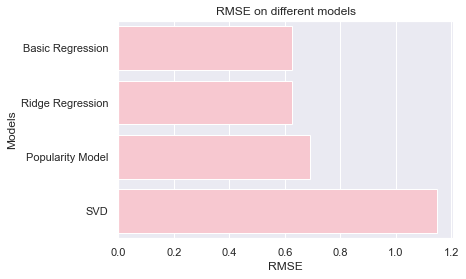

In [47]:
# bar chart comparing the RMSE values for the two regression models, 
# the popularity-based average rating model, and the SVD-based model.
pt = pd.DataFrame({'Models':['Basic Regression','Ridge Regression','Popularity Model','SVD'],'RMSE':[0.6266723062132299,0.6266364293245104,0.6910930030264725,1.1490489962804413]})
sns.set(rc = {'figure.figsize':(6,4)})
sns.barplot(x = "RMSE",y = "Models", data = pt, color = "pink" ).set(title = "RMSE on different models")

## THE END